<a href="https://colab.research.google.com/github/ColbyHunterSmith/ColbyHunterSmith/blob/main/ExampleModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install rdkit-pypi -qqq
!pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 14.7 MB/s eta 0:00:00


In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import numpy as np
import pandas as pd

In [ ]:
# Upload the Excel file containing SMILES, HOMO, LUMO, and F/F data
uploaded = files.upload()

# Read the uploaded Excel file
cols = ["SMILES", "Name", "HOMO(Gaussian)", "LUMO(Gaussian)", "PBS-DeltaF/Fn", "NaCl-DeltaF/F", "Class"]
df = pd.read_excel(next(iter(uploaded)), names=cols)

# Exclude the "Name" column
df = df.drop(columns=["Name"])

# Will create labels based on values in column PBS
df["Class"] = (df["PBS-DeltaF/Fn"] > 0.3).astype(int)

mols = [Chem.MolFromSmiles(smiles) for smiles in df["SMILES"]]
fingerprints = [AllChem.GetMorganFingerprintAsBitVect(mol, 2) for mol in mols]
df["SMILES"] = fingerprints

print(df.head())


In [ ]:
# List of column indices to check (3, 4, 5, and 6)
columns_to_check = [1, 2, 3, 4]

for col_index in columns_to_check:
    label = df.columns[col_index]  # Get the column label using the column index
    plt.hist(df[df["Class"] == 1].iloc[:, col_index], color='blue', label='1', alpha=0.7, density=True)
    plt.hist(df[df["Class"] == 0].iloc[:, col_index], color='red', label='0', alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel('Probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()

#Histograms

#Train, Validation, test datasets


In [ ]:
train, valid, test = np.split(df.sample(frac = 1), [int(0.6*len(df)), int(0.8*len(df))])

In [ ]:
print(len(train[train["Class"]==1]))
print(len(train[train["Class"]==0]))

19
18


In [ ]:
def sample_dataset(dataframe, oversample = False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [ ]:
train, X_train, y_train = sample_dataset(train, oversample = True)
valid, X_valid, y_valid = sample_dataset(valid, oversample = False)
test, X_test, y_test = sample_dataset(test, oversample = False)


In [ ]:
#This will allow you to view the feature vectors, this is with oversampling included.

print(y_train)
print(X_train)

Naive Bayes


In [ ]:
# Upload the Excel file containing SMILES, HOMO, LUMO, and F/F data
uploaded = files.upload()

# Read the uploaded Excel file
df = pd.read_excel(next(iter(uploaded)))

# Define column names for better clarity
column_names = ["SMILES", "Name", "HOMO(Gaussian)", "LUMO(Gaussian)", "PBS-DeltaF/Fn", "NaCl-DeltaF/F", "Class"]

# Rename the DataFrame columns
df.columns = column_names

# Extract columns using descriptive variable names
smiles_column = df['SMILES']
homo_column = df['HOMO(Gaussian)']
lumo_column = df['LUMO(Gaussian)']
ff_column = df['PBS-DeltaF/Fn']

# Convert SMILES column to a list
smiles_list = smiles_column.to_list()

# Convert HOMO, LUMO, and F/F columns to numeric arrays
homo_values = homo_column.to_numpy().astype(float)
lumo_values = lumo_column.to_numpy().astype(float)
ff_values = ff_column.to_numpy().astype(float)

# Create RDKit Mol objects from SMILES
mols = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]

# Generate fingerprints using RDKit's Morgan fingerprint
fingerprints = [AllChem.GetMorganFingerprintAsBitVect(mol, 2) for mol in mols]

# Create 'values' array from the 'F/F' column
values = ff_values

# Create 'labels' array based on positive and negative numbers
labels = df["Class"] = (df["PBS-DeltaF/Fn"] > 0).astype(int)

majority = max((df["Class"] == 0).sum(), (df["Class"] == 1).sum())

# Print the length of the molecule and fingerprint lists
print(f"Number of molecules: {len(mols)}")
print(smiles_list)
print(f"Number of fingerprints: {len(fingerprints)}")
print(labels)
print(majority)


In [ ]:
# Upload the Excel file containing SMILES, HOMO, LUMO, and F/F data
uploaded = files.upload()

# Read the uploaded Excel file
df = pd.read_excel(next(iter(uploaded)))

# Define column names for better clarity
column_names = ["SMILES", "Name", "HOMO(Gaussian)", "LUMO(Gaussian)", "PBS-DeltaF/Fn", "NaCl-DeltaF/F", "Class"]

# Rename the DataFrame columns
df.columns = column_names

# Extract columns using descriptive variable names
smiles_column = df['SMILES']
homo_column = df['HOMO(Gaussian)']
lumo_column = df['LUMO(Gaussian)']
ff_column = df['PBS-DeltaF/Fn']

# Convert SMILES column to a list
smiles_list = smiles_column.to_list()

# Convert HOMO, LUMO, and F/F columns to numeric arrays
homo_values = homo_column.to_numpy().astype(float)
lumo_values = lumo_column.to_numpy().astype(float)
ff_values = ff_column.to_numpy().astype(float)

# Create RDKit Mol objects from SMILES
mols = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]

# Generate fingerprints using RDKit's Morgan fingerprint
fingerprints = [AllChem.GetMACCSKeysFingerprint(mol) for mol in mols]

# Create 'values' array from the 'F/F' column
values = ff_values

# Create 'labels' array based on positive and negative numbers
labels = df["Class"] = (df["PBS-DeltaF/Fn"] > 0).astype(int)

# Print the length of the molecule and fingerprint lists
print(f"Number of molecules: {len(mols)}")
print(smiles_list)
print(f"Number of fingerprints: {len(fingerprints)}")
print(labels)


In [ ]:
df.head()

Feature Probabilities:
Average Accuracy: 0.6842307692307693
Average F1 Score: 0.6182028502879392
Average Recall: [0.27954762 0.92962608]
[0.5384615384615384, 0.6923076923076923, 0.6153846153846154, 0.6923076923076923, 0.6153846153846154, 0.7692307692307693, 0.7692307692307693, 0.8461538461538461, 0.7692307692307693, 0.6923076923076923, 0.9230769230769231, 0.5384615384615384, 0.46153846153846156, 0.46153846153846156, 0.8461538461538461, 0.5384615384615384, 0.46153846153846156, 0.7692307692307693, 0.6923076923076923, 0.6153846153846154, 0.5384615384615384, 0.6153846153846154, 0.5384615384615384, 0.5384615384615384, 0.38461538461538464, 0.6153846153846154, 0.5384615384615384, 0.5384615384615384, 0.8461538461538461, 0.7692307692307693, 0.8461538461538461, 0.8461538461538461, 0.7692307692307693, 0.46153846153846156, 0.9230769230769231, 0.6923076923076923, 0.5384615384615384, 0.7692307692307693, 0.7692307692307693, 0.8461538461538461, 0.5384615384615384, 0.7692307692307693, 0.461538461538461

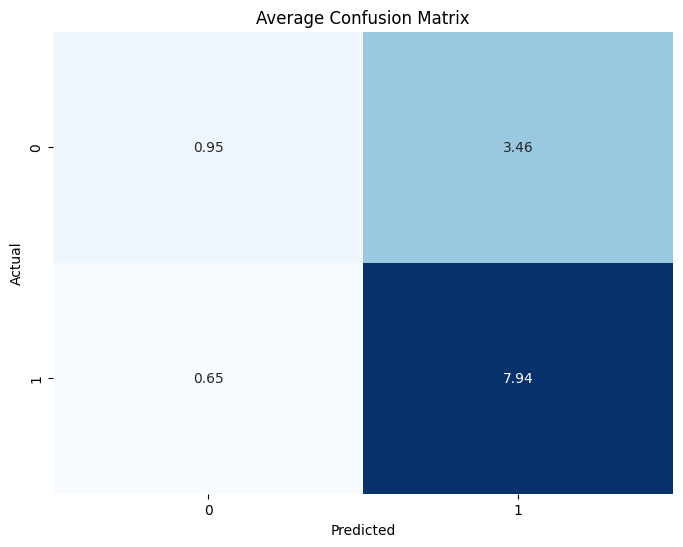

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, classification_report

# Set a random seed for reproducibility
random.seed(50)
np.random.seed(50)

# Combine the features into a single array
features = np.column_stack((fingerprints, homo_values, lumo_values, ff_values))

# Initialize lists to store evaluation metrics and confusion matrices
accuracies = []
f1_scores = []
recall_scores = []
cms = []
probabilities = []
feature_probabilities = []

# Initialize a list to store F1 scores for each run
f1_scores_200 = []

# Run the model 200 times with different random states
for i in range(200):
    # Shuffle the data using a random number generator
    permutation = np.random.permutation(len(features))
    shuffled_features = features[permutation]
    shuffled_labels = labels[permutation]

    # Split the shuffled features and labels into training and testing datasets
    X_train, X_test, y_train, y_test = train_test_split(shuffled_features, shuffled_labels, test_size=0.20, random_state=i)

    # Train an SVC model
    svc_model = SVC(probability=True, random_state=i)
    svc_model.fit(X_train, y_train)

    # Evaluate the model on the testing dataset
    y_pred = svc_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average=None)  # Calculate recall for each class separately
    cm = confusion_matrix(y_test, y_pred)
    proba = svc_model.predict_proba(X_test)  # Get the predicted probabilities

    # Store the evaluation metrics, confusion matrix, probabilities, and feature probabilities
    accuracies.append(accuracy)
    f1_scores.append(f1)
    recall_scores.append(recall)
    cms.append(cm)
    probabilities.append(proba)
    feature_probabilities.extend(list(zip(range(1, len(X_test) + 1), [tuple(f) for f in X_test], proba)))  # Store index, features, and their probabilities

    # Store the F1 score for this run
    f1_scores_200.append(f1)

# Create a DataFrame for F1 scores
f1_scores_df = pd.DataFrame({'Run': range(1, 201), 'F1_Score': f1_scores_200})

# Calculate the average accuracy, F1 score, and recall
avg_accuracy = np.mean(accuracies)
avg_f1 = np.mean(f1_scores)
avg_recall = np.mean(recall_scores, axis=0)  # Calculate the average recall for each class separately

# Calculate the average confusion matrix
avg_cm = np.mean(cms, axis=0)

# Output feature probabilities
print('Feature Probabilities:')
feature_probabilities_avg = {}
for idx in range(62):  # Features 1-63
    feature = tuple(features[idx])
    if feature in feature_probabilities_avg:
        feature_probabilities_avg[feature].append(probabilities[idx])
    else:
        feature_probabilities_avg[feature] = [probabilities[idx]]

# Print the average accuracy, F1 score, and recall
print(f'Average Accuracy: {avg_accuracy}')
print(f'Average F1 Score: {avg_f1}')
print(f'Average Recall: {avg_recall}')
print(accuracies)
print(f1_scores)

print(classification_report(y_test, y_pred))

# Plot the average confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(avg_cm, annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.title("Average Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Create a dictionary to store the data
data = {'Reference': [], 'Probability_1': [], 'Probability_0': [], 'F1 Score': [], 'Accuracy': [], 'Recall_0': [], 'Recall_1': []}

# Iterate over the feature probabilities
for idx in range(62):  # Features 1-63
    feature = tuple(features[idx])
    if feature in feature_probabilities_avg:
        probabilities = feature_probabilities_avg[feature]
        avg_probabilities = np.mean(probabilities, axis=0)
        percentage_1 = avg_probabilities[:, 1].mean() * 100
        percentage_0 = avg_probabilities[:, 0].mean() * 100

        # Add data to the dictionary
        data['Reference'].append(idx + 1)
        data['Probability_1'].append(percentage_1)
        data['Probability_0'].append(percentage_0)
        data['F1 Score'].append(f1_scores)
        data['Accuracy'].append(avg_accuracy)
        data['Recall_0'].append(avg_recall[0])  # Average recall for class 0
        data['Recall_1'].append(avg_recall[1])  # Average recall for class 1

# Create a DataFrame from the data dictionary
df = pd.DataFrame(data)

# Determine the classifier and fingerprint names
classifier_name = type(svc_model).__name__
fingerprint_name = "MGN"  # MORGAN

# Create the output file names
output_file_metrics = f"{fingerprint_name}_{classifier_name}_metrics.xlsx"
output_file_f1_scores = f"{fingerprint_name}_{classifier_name}_f1_scores.xlsx"

# Save the DataFrames to separate Excel files
with pd.ExcelWriter(output_file_metrics, engine='openpyxl') as writer_metrics, pd.ExcelWriter(output_file_f1_scores, engine='openpyxl') as writer_f1_scores:
    df.to_excel(writer_metrics, index=False, sheet_name='Summary')
    f1_scores_df.to_excel(writer_f1_scores, index=False, sheet_name='F1_Scores')

# Download the Excel files
# files.download(output_file_metrics)
files.download(output_file_f1_scores)



Feature Probabilities:
Average Accuracy: 0.9084615384615384
Average F1 Score: 0.908745992517227
Average Recall: [0.89860714 0.92008929]
[1.0, 0.9230769230769231, 0.9230769230769231, 0.9230769230769231, 0.6923076923076923, 0.9230769230769231, 1.0, 0.9230769230769231, 1.0, 0.9230769230769231, 1.0, 0.9230769230769231, 0.9230769230769231, 0.9230769230769231, 0.8461538461538461, 0.9230769230769231, 0.9230769230769231, 0.9230769230769231, 0.9230769230769231, 0.9230769230769231, 0.9230769230769231, 0.8461538461538461, 0.8461538461538461, 0.7692307692307693, 0.9230769230769231, 1.0, 1.0, 1.0, 0.9230769230769231, 0.9230769230769231, 0.8461538461538461, 0.9230769230769231, 0.7692307692307693, 1.0, 1.0, 1.0, 0.9230769230769231, 0.9230769230769231, 1.0, 0.9230769230769231, 1.0, 1.0, 0.8461538461538461, 1.0, 1.0, 1.0, 0.8461538461538461, 1.0, 0.9230769230769231, 0.8461538461538461, 1.0, 0.8461538461538461, 1.0, 0.8461538461538461, 0.8461538461538461, 0.9230769230769231, 0.8461538461538461, 0.923076

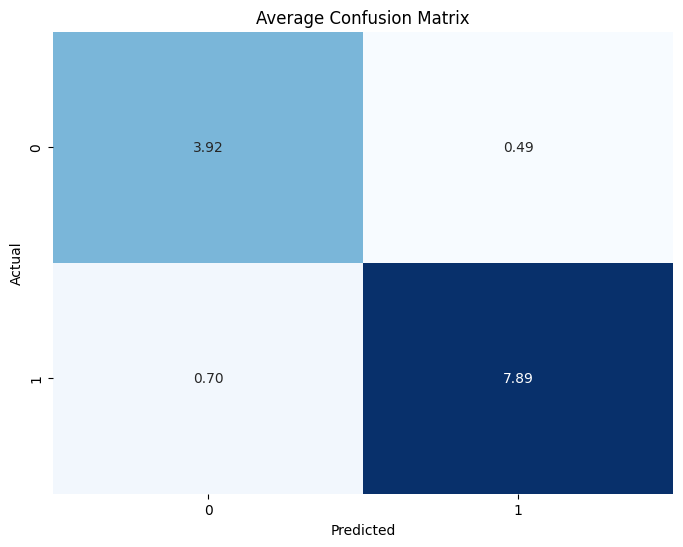

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, classification_report

# Set a random seed for reproducibility
random.seed(50)
np.random.seed(50)

# Combine the features into a single array
features = np.column_stack((fingerprints,ff_values))

# Initialize lists to store evaluation metrics and confusion matrices
accuracies = []
f1_scores = []
recall_scores = []
cms = []
probabilities = []
feature_probabilities = []

# Initialize a list to store F1 scores for each run
f1_scores_200 = []

# Run the model 200 times with different random states
for i in range(200):
    # Shuffle the data using a random number generator
    permutation = np.random.permutation(len(features))
    shuffled_features = features[permutation]
    shuffled_labels = labels[permutation]

    # Split the shuffled features and labels into training and testing datasets
    X_train, X_test, y_train, y_test = train_test_split(shuffled_features, shuffled_labels, test_size=0.20, random_state=i)

    # Train an RF model
    rf_model = RandomForestClassifier(n_estimators=100, random_state=i)
    rf_model.fit(X_train, y_train)


    # Evaluate the model on the testing dataset
    y_pred = rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average=None)  # Calculate recall for each class separately
    cm = confusion_matrix(y_test, y_pred)
    proba = rf_model.predict_proba(X_test)  # Get the predicted probabilities

    # Store the evaluation metrics, confusion matrix, probabilities, and feature probabilities
    accuracies.append(accuracy)
    f1_scores.append(f1)
    recall_scores.append(recall)
    cms.append(cm)
    probabilities.append(proba)
    feature_probabilities.extend(list(zip(range(1, len(X_test) + 1), [tuple(f) for f in X_test], proba)))  # Store index, features, and their probabilities

    # Store the F1 score for this run
    f1_scores_200.append(f1)

# Create a DataFrame for F1 scores
f1_scores_df = pd.DataFrame({'Run': range(1, 201), 'F1_Score': f1_scores_200})

# Calculate the average accuracy, F1 score, and recall
avg_accuracy = np.mean(accuracies)
avg_f1 = np.mean(f1_scores)
avg_recall = np.mean(recall_scores, axis=0)  # Calculate the average recall for each class separately

# Calculate the average confusion matrix
avg_cm = np.mean(cms, axis=0)

# Output feature probabilities
print('Feature Probabilities:')
feature_probabilities_avg = {}
for idx in range(62):  # Features 1-63
    feature = tuple(features[idx])
    if feature in feature_probabilities_avg:
        feature_probabilities_avg[feature].append(probabilities[idx])
    else:
        feature_probabilities_avg[feature] = [probabilities[idx]]

# Print the average accuracy, F1 score, and recall
print(f'Average Accuracy: {avg_accuracy}')
print(f'Average F1 Score: {avg_f1}')
print(f'Average Recall: {avg_recall}')
print(accuracies)
print(f1_scores)

print(classification_report(y_test, y_pred))

# Plot the average confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(avg_cm, annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.title("Average Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Create a dictionary to store the data
data = {'Reference': [], 'Probability_1': [], 'Probability_0': [], 'F1 Score': [], 'Accuracy': [], 'Recall_0': [], 'Recall_1': []}

# Iterate over the feature probabilities
for idx in range(62):  # Features 1-63
    feature = tuple(features[idx])
    if feature in feature_probabilities_avg:
        probabilities = feature_probabilities_avg[feature]
        avg_probabilities = np.mean(probabilities, axis=0)
        percentage_1 = avg_probabilities[:, 1].mean() * 100
        percentage_0 = avg_probabilities[:, 0].mean() * 100

        # Add data to the dictionary
        data['Reference'].append(idx + 1)
        data['Probability_1'].append(percentage_1)
        data['Probability_0'].append(percentage_0)
        data['F1 Score'].append(f1_scores)
        data['Accuracy'].append(avg_accuracy)
        data['Recall_0'].append(avg_recall[0])  # Average recall for class 0
        data['Recall_1'].append(avg_recall[1])  # Average recall for class 1

# Create a DataFrame from the data dictionary
df = pd.DataFrame(data)

# Determine the classifier and fingerprint names
classifier_name = type(rf_model).__name__
fingerprint_name = "MGN"  # MORGAN

# Create the output file names
output_file_metrics = f"{fingerprint_name}_{classifier_name}_metrics.xlsx"
output_file_f1_scores = f"{fingerprint_name}_{classifier_name}_f1_scores.xlsx"

# Save the DataFrames to separate Excel files
with pd.ExcelWriter(output_file_metrics, engine='openpyxl') as writer_metrics, pd.ExcelWriter(output_file_f1_scores, engine='openpyxl') as writer_f1_scores:
    df.to_excel(writer_metrics, index=False, sheet_name='Summary')
    f1_scores_df.to_excel(writer_f1_scores, index=False, sheet_name='F1_Scores')

# Download the Excel files
#files.download(output_file_metrics)
files.download(output_file_f1_scores)



[[ 0.          1.          0.         ...  0.         -6.58025981
  -0.9959371 ]
 [ 0.          0.          0.         ...  0.         -6.70788126
  -0.87838387]
 [ 0.          0.          0.         ...  0.         -5.65588869
  -1.22424071]
 ...
 [ 0.          0.          0.         ...  0.         -5.70813457
  -0.2       ]
 [ 0.          0.          0.         ...  0.         -6.68556792
  -1.5       ]
 [ 0.          0.          0.         ...  0.         -6.22079727
   0.        ]]
Feature Probabilities:
Average Accuracy: 0.7380769230769231
Average F1 Score: 0.7123053562738245
Average Recall: [0.4411131  0.90380267]
              precision    recall  f1-score   support

           0       0.67      0.40      0.50         5
           1       0.70      0.88      0.78         8

    accuracy                           0.69        13
   macro avg       0.68      0.64      0.64        13
weighted avg       0.69      0.69      0.67        13



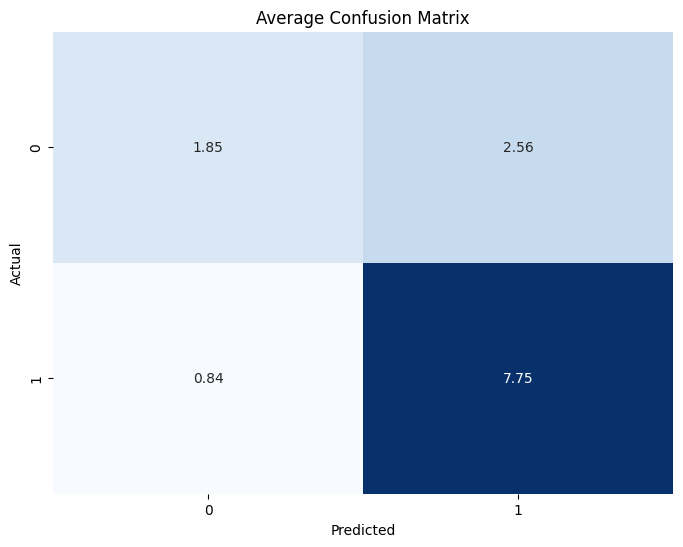

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#RandomForestClassifier

from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score
from google.colab import files

# Set a random seed for reproducibility
random.seed(50)
np.random.seed(50)

# Combine the features into a single array
features = np.column_stack((fingerprints, homo_values, lumo_values))
print(features)

# Initialize lists to store evaluation metrics and confusion matrices
accuracies = []
f1_scores = []
recall_scores = []
cms = []
probabilities = []
feature_probabilities = []

# Run the model 200 times with different random states
for i in range(200):
    # Shuffle the data using a random number generator
    permutation = np.random.permutation(len(features))
    shuffled_features = features[permutation]
    shuffled_labels = labels[permutation]

    # Split the shuffled features and labels into training and testing datasets
    X_train, X_test, y_train, y_test = train_test_split(shuffled_features, shuffled_labels, test_size=0.20, random_state=i)

    # Train a Random Forest model
    rf_model = RandomForestClassifier(n_estimators=100, random_state=i)
    rf_model.fit(X_train, y_train)

    # Evaluate the model on the testing dataset
    y_pred = rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average=None)  # Calculate recall for each class separately
    cm = confusion_matrix(y_test, y_pred)
    proba = rf_model.predict_proba(X_test)  # Get the predicted probabilities

    # Store the evaluation metrics, confusion matrix, probabilities, and feature probabilities
    accuracies.append(accuracy)
    f1_scores.append(f1)
    recall_scores.append(recall)
    cms.append(cm)
    probabilities.append(proba)
    feature_probabilities.extend(list(zip(range(1, len(X_test) + 1), [tuple(f) for f in X_test], proba)))  # Store index, features, and their probabilities

# Calculate the average accuracy, F1 score, and recall
avg_accuracy = np.mean(accuracies)
avg_f1 = np.mean(f1_scores)
avg_recall = np.mean(recall_scores, axis=0)  # Calculate the average recall for each class separately

# Calculate the average confusion matrix
avg_cm = np.mean(cms, axis=0)

# Output feature probabilities
print('Feature Probabilities:')
feature_probabilities_avg = {}
for idx in range(62):  # Features 1-63
    feature = tuple(features[idx])
    if feature in feature_probabilities_avg:
        feature_probabilities_avg[feature].append(probabilities[idx])
    else:
        feature_probabilities_avg[feature] = [probabilities[idx]]

# Print the average accuracy, F1 score, and recall
print(f'Average Accuracy: {avg_accuracy}')
print(f'Average F1 Score: {avg_f1}')
print(f'Average Recall: {avg_recall}')

print(classification_report(y_test, y_pred))

# Plot the average confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(avg_cm, annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.title("Average Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Create a dictionary to store the data
data = {'Reference': [], 'Probability_1': [], 'Probability_0': [], 'F1 Score': [], 'Accuracy': [], 'Recall_0': [], 'Recall_1': []}

# Iterate over the feature probabilities
for idx in range(62):  # Features 1-63
    feature = tuple(features[idx])
    if feature in feature_probabilities_avg:
        probabilities = feature_probabilities_avg[feature]
        avg_probabilities = np.mean(probabilities, axis=0)
        percentage_1 = avg_probabilities[:, 1].mean() * 100
        percentage_0 = avg_probabilities[:, 0].mean() * 100

        # Add data to the dictionary
        data['Reference'].append(idx + 1)
        data['Probability_1'].append(percentage_1)
        data['Probability_0'].append(percentage_0)
        data['F1 Score'].append(avg_f1)
        data['Accuracy'].append(avg_accuracy)
        data['Recall_0'].append(avg_recall[0])  # Average recall for class 0
        data['Recall_1'].append(avg_recall[1])  # Average recall for class 1

# Create a DataFrame from the data dictionary
df = pd.DataFrame(data)

# Determine the classifier and fingerprint names
classifier_name = type(rf_model).__name__
fingerprint_name = "MGN"  #MORGAN

# Create the output file name
output_file = f"{fingerprint_name}_{classifier_name}.xlsx"

# Save the DataFrame and probabilities to an Excel file
with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
    df.to_excel(writer, index=False, sheet_name='Summary')
    for idx, proba in enumerate(probabilities):
        proba_df = pd.DataFrame(proba, columns=['Probability_0', 'Probability_1'])
        proba_df.to_excel(writer, index=False, sheet_name=f'Reference_{idx + 1}_Probabilities')

# Download the Excel file
#files.download(output_file)




Feature Probabilities:
Average Accuracy: 1.0
Average F1 Score: 1.0
Average Recall: [1. 1.]


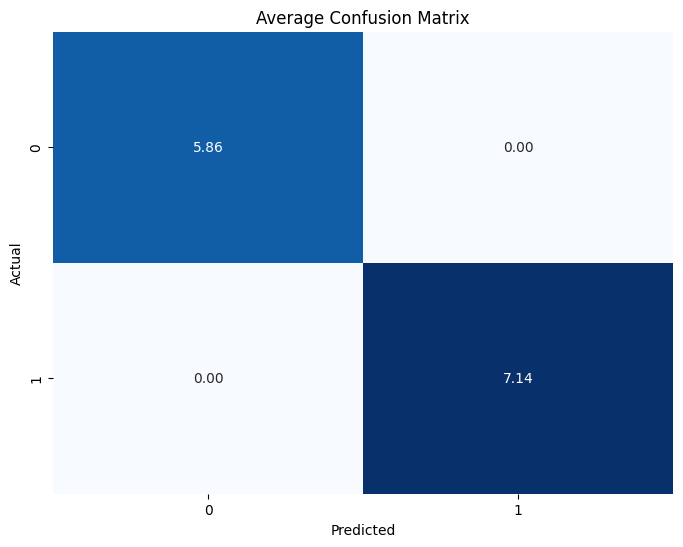

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#AdaBoostClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score
from google.colab import files

# Set a random seed for reproducibility
random.seed(50)
np.random.seed(50)

# Combine the features into a single array
features = np.column_stack((fingerprints, homo_values, lumo_values, ff_values))

# Initialize lists to store evaluation metrics and confusion matrices
accuracies = []
f1_scores = []
recall_scores = []
cms = []
probabilities = []
feature_probabilities = []

# Run the model 200 times with different random states
for i in range(200):
    # Shuffle the data using a random number generator
    permutation = np.random.permutation(len(features))
    shuffled_features = features[permutation]
    shuffled_labels = labels[permutation]

    # Split the shuffled features and labels into training and testing datasets
    X_train, X_test, y_train, y_test = train_test_split(shuffled_features, shuffled_labels, test_size=0.20, random_state=i)

    # Train a AdaBoost
    ada_model = AdaBoostClassifier(n_estimators=100, random_state=i)
    ada_model.fit(X_train, y_train)

    # Evaluate the model on the testing dataset
    y_pred = ada_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average=None)  # Calculate recall for each class separately
    cm = confusion_matrix(y_test, y_pred)
    proba = ada_model.predict_proba(X_test)  # Get the predicted probabilities

    # Store the evaluation metrics, confusion matrix, probabilities, and feature probabilities
    accuracies.append(accuracy)
    f1_scores.append(f1)
    recall_scores.append(recall)
    cms.append(cm)
    probabilities.append(proba)
    feature_probabilities.extend(list(zip(range(1, len(X_test) + 1), [tuple(f) for f in X_test], proba)))  # Store index, features, and their probabilities

# Calculate the average accuracy, F1 score, and recall
avg_accuracy = np.mean(accuracies)
avg_f1 = np.mean(f1_scores)
avg_recall = np.mean(recall_scores, axis=0)  # Calculate the average recall for each class separately

# Calculate the average confusion matrix
avg_cm = np.mean(cms, axis=0)

# Output feature probabilities
print('Feature Probabilities:')
feature_probabilities_avg = {}
for idx in range(63):  # Features 1-63
    feature = tuple(features[idx])
    if feature in feature_probabilities_avg:
        feature_probabilities_avg[feature].append(probabilities[idx])
    else:
        feature_probabilities_avg[feature] = [probabilities[idx]]

# Print the average accuracy, F1 score, and recall
print(f'Average Accuracy: {avg_accuracy}')
print(f'Average F1 Score: {avg_f1}')
print(f'Average Recall: {avg_recall}')


# Plot the average confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(avg_cm, annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.title("Average Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Create a dictionary to store the data
data = {'Reference': [], 'Probability_1': [], 'Probability_0': [], 'F1 Score': [], 'Accuracy': [], 'Recall_0': [], 'Recall_1': []}

# Iterate over the feature probabilities
for idx in range(63):  # Features 1-63
    feature = tuple(features[idx])
    if feature in feature_probabilities_avg:
        probabilities = feature_probabilities_avg[feature]
        avg_probabilities = np.mean(probabilities, axis=0)
        percentage_1 = avg_probabilities[:, 1].mean() * 100
        percentage_0 = avg_probabilities[:, 0].mean() * 100

        # Add data to the dictionary
        data['Reference'].append(idx + 1)
        data['Probability_1'].append(percentage_1)
        data['Probability_0'].append(percentage_0)
        data['F1 Score'].append(avg_f1)
        data['Accuracy'].append(avg_accuracy)
        data['Recall_0'].append(avg_recall[0])  # Average recall for class 0
        data['Recall_1'].append(avg_recall[1])  # Average recall for class 1

# Create a DataFrame from the data dictionary
df = pd.DataFrame(data)

# Determine the classifier and fingerprint names
classifier_name = type(ada_model).__name__
fingerprint_name = "MGN"  #MORGAN

# Create the output file name
output_file = f"{fingerprint_name}_{classifier_name}.xlsx"

# Save the DataFrame and probabilities to an Excel file
with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
    df.to_excel(writer, index=False, sheet_name='Summary')
    for idx, proba in enumerate(probabilities):
        proba_df = pd.DataFrame(proba, columns=['Probability_0', 'Probability_1'])
        proba_df.to_excel(writer, index=False, sheet_name=f'Reference_{idx + 1}_Probabilities')

# Download the Excel file
files.download(output_file)




Feature Probabilities:
Average Accuracy: 1.0
Average F1 Score: 1.0
Average Recall: [1. 1.]


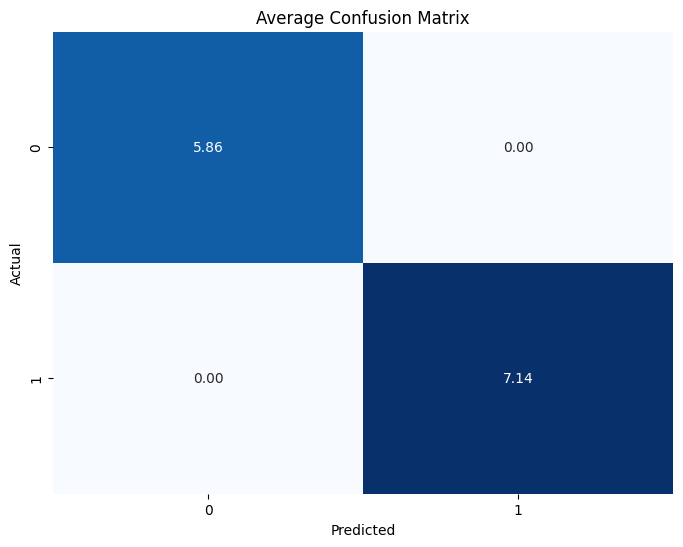

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#BaggingClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score
from google.colab import files

# Set a random seed for reproducibility
random.seed(50)
np.random.seed(50)

# Combine the features into a single array
features = np.column_stack((fingerprints, homo_values, lumo_values, ff_values))

# Initialize lists to store evaluation metrics and confusion matrices
accuracies = []
f1_scores = []
recall_scores = []
cms = []
probabilities = []
feature_probabilities = []

# Run the model 200 times with different random states
for i in range(200):
    # Shuffle the data using a random number generator
    permutation = np.random.permutation(len(features))
    shuffled_features = features[permutation]
    shuffled_labels = labels[permutation]

    # Split the shuffled features and labels into training and testing datasets
    X_train, X_test, y_train, y_test = train_test_split(shuffled_features, shuffled_labels, test_size=0.20, random_state=i)

    # Train a Bagging Model
    bag_model = BaggingClassifier(n_estimators=100, random_state=i)
    bag_model.fit(X_train, y_train)

    # Evaluate the model on the testing dataset
    y_pred = bag_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average=None)  # Calculate recall for each class separately
    cm = confusion_matrix(y_test, y_pred)
    proba = bag_model.predict_proba(X_test)  # Get the predicted probabilities

    # Store the evaluation metrics, confusion matrix, probabilities, and feature probabilities
    accuracies.append(accuracy)
    f1_scores.append(f1)
    recall_scores.append(recall)
    cms.append(cm)
    probabilities.append(proba)
    feature_probabilities.extend(list(zip(range(1, len(X_test) + 1), [tuple(f) for f in X_test], proba)))  # Store index, features, and their probabilities

# Calculate the average accuracy, F1 score, and recall
avg_accuracy = np.mean(accuracies)
avg_f1 = np.mean(f1_scores)
avg_recall = np.mean(recall_scores, axis=0)  # Calculate the average recall for each class separately

# Calculate the average confusion matrix
avg_cm = np.mean(cms, axis=0)

# Output feature probabilities
print('Feature Probabilities:')
feature_probabilities_avg = {}
for idx in range(63):  # Features 1-63
    feature = tuple(features[idx])
    if feature in feature_probabilities_avg:
        feature_probabilities_avg[feature].append(probabilities[idx])
    else:
        feature_probabilities_avg[feature] = [probabilities[idx]]

# Print the average accuracy, F1 score, and recall
print(f'Average Accuracy: {avg_accuracy}')
print(f'Average F1 Score: {avg_f1}')
print(f'Average Recall: {avg_recall}')


# Plot the average confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(avg_cm, annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.title("Average Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Create a dictionary to store the data
data = {'Reference': [], 'Probability_1': [], 'Probability_0': [], 'F1 Score': [], 'Accuracy': [], 'Recall_0': [], 'Recall_1': []}

# Iterate over the feature probabilities
for idx in range(63):  # Features 1-63
    feature = tuple(features[idx])
    if feature in feature_probabilities_avg:
        probabilities = feature_probabilities_avg[feature]
        avg_probabilities = np.mean(probabilities, axis=0)
        percentage_1 = avg_probabilities[:, 1].mean() * 100
        percentage_0 = avg_probabilities[:, 0].mean() * 100

        # Add data to the dictionary
        data['Reference'].append(idx + 1)
        data['Probability_1'].append(percentage_1)
        data['Probability_0'].append(percentage_0)
        data['F1 Score'].append(avg_f1)
        data['Accuracy'].append(avg_accuracy)
        data['Recall_0'].append(avg_recall[0])  # Average recall for class 0
        data['Recall_1'].append(avg_recall[1])  # Average recall for class 1

# Create a DataFrame from the data dictionary
df = pd.DataFrame(data)

# Determine the classifier and fingerprint names
classifier_name = type(bag_model).__name__
fingerprint_name = "MGN"  #MORGAN

# Create the output file name
output_file = f"{fingerprint_name}_{classifier_name}.xlsx"

# Save the DataFrame and probabilities to an Excel file
with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
    df.to_excel(writer, index=False, sheet_name='Summary')
    for idx, proba in enumerate(probabilities):
        proba_df = pd.DataFrame(proba, columns=['Probability_0', 'Probability_1'])
        proba_df.to_excel(writer, index=False, sheet_name=f'Reference_{idx + 1}_Probabilities')

# Download the Excel file
files.download(output_file)


Feature Probabilities:
Average Accuracy: 0.7823076923076923
Average F1 Score: 0.7726019392973726
Average Recall: [0.63230556 0.92503499]


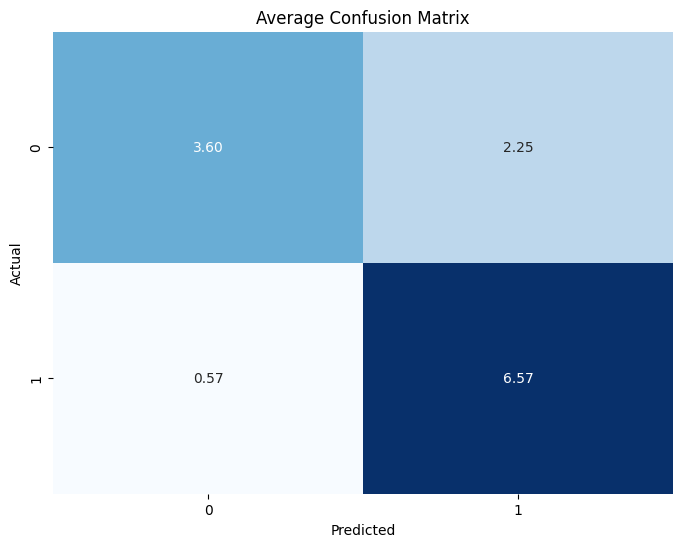

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#ComplementNB

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score
from sklearn.preprocessing import MinMaxScaler
from google.colab import files

# Set a random seed for reproducibility
random.seed(50)
np.random.seed(50)

# Combine the features into a single array
features = np.column_stack((fingerprints, homo_values, lumo_values, ff_values))

# Apply data scaling to ensure non-negative values
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

# Initialize lists to store evaluation metrics and confusion matrices
accuracies = []
f1_scores = []
recall_scores = []
cms = []
probabilities = []
feature_probabilities = []

# Run the model 200 times with different random states
for i in range(200):
    # Shuffle the data using a random number generator
    permutation = np.random.permutation(len(features))
    shuffled_features = features[permutation]
    shuffled_labels = labels[permutation]

    # Split the shuffled features and labels into training and testing datasets
    X_train, X_test, y_train, y_test = train_test_split(shuffled_features, shuffled_labels, test_size=0.20, random_state=i)

    # Train a Complement Naive Bayes model
    nb_model = ComplementNB()
    nb_model.fit(X_train, y_train)

    # Evaluate the model on the testing dataset
    y_pred = nb_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average=None)  # Calculate recall for each class separately
    cm = confusion_matrix(y_test, y_pred)
    proba = nb_model.predict_proba(X_test)  # Get the predicted probabilities

    # Store the evaluation metrics, confusion matrix, probabilities, and feature probabilities
    accuracies.append(accuracy)
    f1_scores.append(f1)
    recall_scores.append(recall)
    cms.append(cm)
    probabilities.append(proba)
    feature_probabilities.extend(list(zip(range(1, len(X_test) + 1), [tuple(f) for f in X_test], proba)))  # Store index, features, and their probabilities

# Calculate the average accuracy, F1 score, and recall
avg_accuracy = np.mean(accuracies)
avg_f1 = np.mean(f1_scores)
avg_recall = np.mean(recall_scores, axis=0)  # Calculate the average recall for each class separately

# Calculate the average confusion matrix
avg_cm = np.mean(cms, axis=0)

# Output feature probabilities
print('Feature Probabilities:')
feature_probabilities_avg = {}
for idx in range(63):  # Features 1-63
    feature = tuple(features[idx])
    if feature in feature_probabilities_avg:
        feature_probabilities_avg[feature].append(probabilities[idx])
    else:
        feature_probabilities_avg[feature] = [probabilities[idx]]

# Print the average accuracy, F1 score, and recall
print(f'Average Accuracy: {avg_accuracy}')
print(f'Average F1 Score: {avg_f1}')
print(f'Average Recall: {avg_recall}')


# Plot the average confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(avg_cm, annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.title("Average Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Create a dictionary to store the data
data = {'Reference': [], 'Probability_1': [], 'Probability_0': [], 'F1 Score': [], 'Accuracy': [], 'Recall_0': [], 'Recall_1': []}

# Iterate over the feature probabilities
for idx in range(63):  # Features 1-63
    feature = tuple(features[idx])
    if feature in feature_probabilities_avg:
        probabilities = feature_probabilities_avg[feature]
        avg_probabilities = np.mean(probabilities, axis=0)
        percentage_1 = avg_probabilities[:, 1].mean() * 100
        percentage_0 = avg_probabilities[:, 0].mean() * 100

        # Add data to the dictionary
        data['Reference'].append(idx + 1)
        data['Probability_1'].append(percentage_1)
        data['Probability_0'].append(percentage_0)
        data['F1 Score'].append(avg_f1)
        data['Accuracy'].append(avg_accuracy)
        data['Recall_0'].append(avg_recall[0])  # Average recall for class 0
        data['Recall_1'].append(avg_recall[1])  # Average recall for class 1

# Create a DataFrame from the data dictionary
df = pd.DataFrame(data)

# Determine the classifier and fingerprint names
classifier_name = type(nb_model).__name__
fingerprint_name = "MGN"  # MORGAN

# Create the output file name
output_file = f"{fingerprint_name}_{classifier_name}.xlsx"

# Save the DataFrame and probabilities to an Excel file
with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
    df.to_excel(writer, index=False, sheet_name='Summary')
    for idx, proba in enumerate(probabilities):
        proba_df = pd.DataFrame(proba, columns=['Probability_0', 'Probability_1'])
        proba_df.to_excel(writer, index=False, sheet_name=f'Reference_{idx + 1}_Probabilities')

# Download the Excel file
files.download(output_file)


Feature Probabilities:
Average Accuracy: 1.0
Average F1 Score: 1.0
Average Recall: [1. 1.]


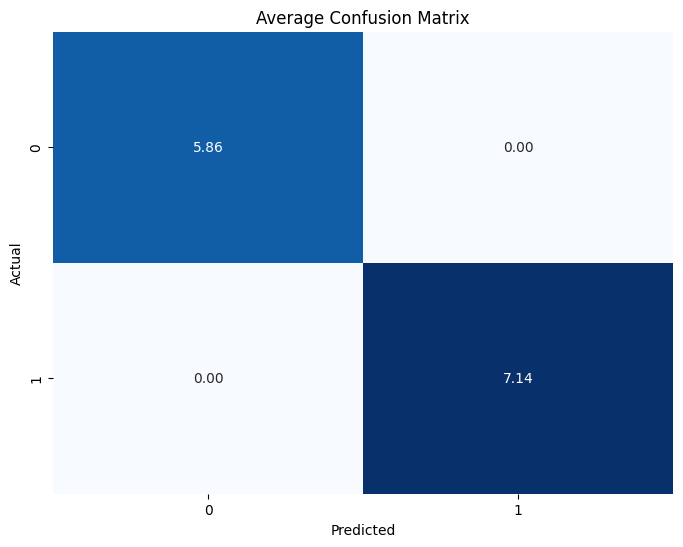

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#DecisionTreeClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score
from google.colab import files

# Set a random seed for reproducibility
random.seed(50)
np.random.seed(50)

# Combine the features into a single array
features = np.column_stack((fingerprints, homo_values, lumo_values, ff_values))

# Initialize lists to store evaluation metrics and confusion matrices
accuracies = []
f1_scores = []
recall_scores = []
cms = []
probabilities = []
feature_probabilities = []

# Run the model 200 times with different random states
for i in range(200):
    # Shuffle the data using a random number generator
    permutation = np.random.permutation(len(features))
    shuffled_features = features[permutation]
    shuffled_labels = labels[permutation]

    # Split the shuffled features and labels into training and testing datasets
    X_train, X_test, y_train, y_test = train_test_split(shuffled_features, shuffled_labels, test_size=0.20, random_state=i)

    # Train a Bagging Model
    decisionTree_model = DecisionTreeClassifier(random_state=i)# This classifier does not offer an estimator parameter, do not add it.
    decisionTree_model.fit(X_train, y_train)

    # Evaluate the model on the testing dataset
    y_pred = decisionTree_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average=None)  # Calculate recall for each class separately
    cm = confusion_matrix(y_test, y_pred)
    proba = decisionTree_model.predict_proba(X_test)  # Get the predicted probabilities

    # Store the evaluation metrics, confusion matrix, probabilities, and feature probabilities
    accuracies.append(accuracy)
    f1_scores.append(f1)
    recall_scores.append(recall)
    cms.append(cm)
    probabilities.append(proba)
    feature_probabilities.extend(list(zip(range(1, len(X_test) + 1), [tuple(f) for f in X_test], proba)))  # Store index, features, and their probabilities

# Calculate the average accuracy, F1 score, and recall
avg_accuracy = np.mean(accuracies)
avg_f1 = np.mean(f1_scores)
avg_recall = np.mean(recall_scores, axis=0)  # Calculate the average recall for each class separately

# Calculate the average confusion matrix
avg_cm = np.mean(cms, axis=0)

# Output feature probabilities
print('Feature Probabilities:')
feature_probabilities_avg = {}
for idx in range(63):  # Features 1-63
    feature = tuple(features[idx])
    if feature in feature_probabilities_avg:
        feature_probabilities_avg[feature].append(probabilities[idx])
    else:
        feature_probabilities_avg[feature] = [probabilities[idx]]

# Print the average accuracy, F1 score, and recall
print(f'Average Accuracy: {avg_accuracy}')
print(f'Average F1 Score: {avg_f1}')
print(f'Average Recall: {avg_recall}')


# Plot the average confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(avg_cm, annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.title("Average Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Create a dictionary to store the data
data = {'Reference': [], 'Probability_1': [], 'Probability_0': [], 'F1 Score': [], 'Accuracy': [], 'Recall_0': [], 'Recall_1': []}

# Iterate over the feature probabilities
for idx in range(63):  # Features 1-63
    feature = tuple(features[idx])
    if feature in feature_probabilities_avg:
        probabilities = feature_probabilities_avg[feature]
        avg_probabilities = np.mean(probabilities, axis=0)
        percentage_1 = avg_probabilities[:, 1].mean() * 100
        percentage_0 = avg_probabilities[:, 0].mean() * 100

        # Add data to the dictionary
        data['Reference'].append(idx + 1)
        data['Probability_1'].append(percentage_1)
        data['Probability_0'].append(percentage_0)
        data['F1 Score'].append(avg_f1)
        data['Accuracy'].append(avg_accuracy)
        data['Recall_0'].append(avg_recall[0])  # Average recall for class 0
        data['Recall_1'].append(avg_recall[1])  # Average recall for class 1

# Create a DataFrame from the data dictionary
df = pd.DataFrame(data)

# Determine the classifier and fingerprint names
classifier_name = type(decisionTree_model).__name__
fingerprint_name = "MGN"  #MORGAN

# Create the output file name
output_file = f"{fingerprint_name}_{classifier_name}.xlsx"

# Save the DataFrame and probabilities to an Excel file
with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
    df.to_excel(writer, index=False, sheet_name='Summary')
    for idx, proba in enumerate(probabilities):
        proba_df = pd.DataFrame(proba, columns=['Probability_0', 'Probability_1'])
        proba_df.to_excel(writer, index=False, sheet_name=f'Reference_{idx + 1}_Probabilities')

# Download the Excel file
files.download(output_file)

Feature Probabilities:
Average Accuracy: 0.7215384615384616
Average F1 Score: 0.7160151393584056
Average Recall: [0.66578175 0.77365368]


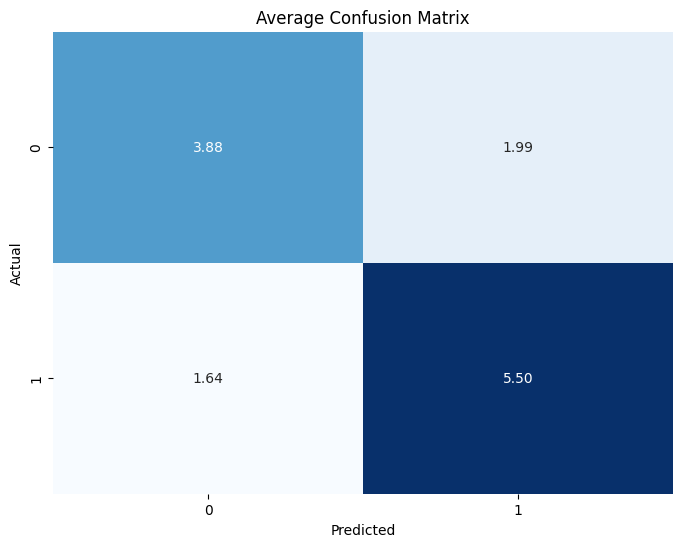

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#ExtraTreeClassifier

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.tree import ExtraTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score
from google.colab import files

# Set a random seed for reproducibility
random.seed(50)
np.random.seed(50)

# Combine the features into a single array
features = np.column_stack((fingerprints, homo_values, lumo_values, ff_values))

# Initialize lists to store evaluation metrics and confusion matrices
accuracies = []
f1_scores = []
recall_scores = []
cms = []
probabilities = []
feature_probabilities = []

# Run the model 200 times with different random states
for i in range(200):
    # Shuffle the data using a random number generator
    permutation = np.random.permutation(len(features))
    shuffled_features = features[permutation]
    shuffled_labels = labels[permutation]

    # Split the shuffled features and labels into training and testing datasets
    X_train, X_test, y_train, y_test = train_test_split(shuffled_features, shuffled_labels, test_size=0.20, random_state=i)

    # Train a Bagging Model
    extraTree_model = ExtraTreeClassifier(random_state=i)#This model does not offer estimators as a parameter.
    extraTree_model.fit(X_train, y_train)

    # Evaluate the model on the testing dataset
    y_pred = extraTree_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average=None)  # Calculate recall for each class separately
    cm = confusion_matrix(y_test, y_pred)
    proba = extraTree_model.predict_proba(X_test)  # Get the predicted probabilities

    # Store the evaluation metrics, confusion matrix, probabilities, and feature probabilities
    accuracies.append(accuracy)
    f1_scores.append(f1)
    recall_scores.append(recall)
    cms.append(cm)
    probabilities.append(proba)
    feature_probabilities.extend(list(zip(range(1, len(X_test) + 1), [tuple(f) for f in X_test], proba)))  # Store index, features, and their probabilities

# Calculate the average accuracy, F1 score, and recall
avg_accuracy = np.mean(accuracies)
avg_f1 = np.mean(f1_scores)
avg_recall = np.mean(recall_scores, axis=0)  # Calculate the average recall for each class separately

# Calculate the average confusion matrix
avg_cm = np.mean(cms, axis=0)

# Output feature probabilities
print('Feature Probabilities:')
feature_probabilities_avg = {}
for idx in range(63):  # Features 1-63
    feature = tuple(features[idx])
    if feature in feature_probabilities_avg:
        feature_probabilities_avg[feature].append(probabilities[idx])
    else:
        feature_probabilities_avg[feature] = [probabilities[idx]]

# Print the average accuracy, F1 score, and recall
print(f'Average Accuracy: {avg_accuracy}')
print(f'Average F1 Score: {avg_f1}')
print(f'Average Recall: {avg_recall}')


# Plot the average confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(avg_cm, annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.title("Average Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Create a dictionary to store the data
data = {'Reference': [], 'Probability_1': [], 'Probability_0': [], 'F1 Score': [], 'Accuracy': [], 'Recall_0': [], 'Recall_1': []}

# Iterate over the feature probabilities
for idx in range(63):  # Features 1-63
    feature = tuple(features[idx])
    if feature in feature_probabilities_avg:
        probabilities = feature_probabilities_avg[feature]
        avg_probabilities = np.mean(probabilities, axis=0)
        percentage_1 = avg_probabilities[:, 1].mean() * 100
        percentage_0 = avg_probabilities[:, 0].mean() * 100

        # Add data to the dictionary
        data['Reference'].append(idx + 1)
        data['Probability_1'].append(percentage_1)
        data['Probability_0'].append(percentage_0)
        data['F1 Score'].append(avg_f1)
        data['Accuracy'].append(avg_accuracy)
        data['Recall_0'].append(avg_recall[0])  # Average recall for class 0
        data['Recall_1'].append(avg_recall[1])  # Average recall for class 1

# Create a DataFrame from the data dictionary
df = pd.DataFrame(data)

# Determine the classifier and fingerprint names
classifier_name = type(extraTree_model).__name__
fingerprint_name = "MGN"  #MORGAN

# Create the output file name
output_file = f"{fingerprint_name}_{classifier_name}.xlsx"

# Save the DataFrame and probabilities to an Excel file
with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
    df.to_excel(writer, index=False, sheet_name='Summary')
    for idx, proba in enumerate(probabilities):
        proba_df = pd.DataFrame(proba, columns=['Probability_0', 'Probability_1'])
        proba_df.to_excel(writer, index=False, sheet_name=f'Reference_{idx + 1}_Probabilities')

# Download the Excel file
files.download(output_file)


Feature Probabilities:
Average Accuracy: 0.791923076923077
Average F1 Score: 0.7903546194517557
Average Recall: [0.75498611 0.83556313]


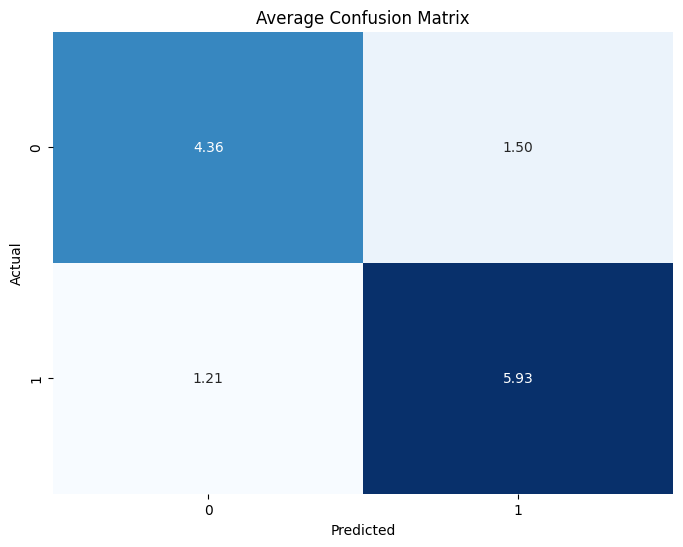

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#ExtraTreesClassifier

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score
from google.colab import files

# Set a random seed for reproducibility
random.seed(50)
np.random.seed(50)

# Combine the features into a single array
features = np.column_stack((fingerprints, homo_values, lumo_values, ff_values))

# Initialize lists to store evaluation metrics and confusion matrices
accuracies = []
f1_scores = []
recall_scores = []
cms = []
probabilities = []
feature_probabilities = []

# Run the model 200 times with different random states
for i in range(200):
    # Shuffle the data using a random number generator
    permutation = np.random.permutation(len(features))
    shuffled_features = features[permutation]
    shuffled_labels = labels[permutation]

    # Split the shuffled features and labels into training and testing datasets
    X_train, X_test, y_train, y_test = train_test_split(shuffled_features, shuffled_labels, test_size=0.20, random_state=i)

    # Train a Bagging Model
    extraTrees_model = ExtraTreesClassifier(random_state=i)
    extraTrees_model.fit(X_train, y_train)

    # Evaluate the model on the testing dataset
    y_pred = extraTrees_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average=None)  # Calculate recall for each class separately
    cm = confusion_matrix(y_test, y_pred)
    proba = extraTrees_model.predict_proba(X_test)  # Get the predicted probabilities

    # Store the evaluation metrics, confusion matrix, probabilities, and feature probabilities
    accuracies.append(accuracy)
    f1_scores.append(f1)
    recall_scores.append(recall)
    cms.append(cm)
    probabilities.append(proba)
    feature_probabilities.extend(list(zip(range(1, len(X_test) + 1), [tuple(f) for f in X_test], proba)))  # Store index, features, and their probabilities

# Calculate the average accuracy, F1 score, and recall
avg_accuracy = np.mean(accuracies)
avg_f1 = np.mean(f1_scores)
avg_recall = np.mean(recall_scores, axis=0)  # Calculate the average recall for each class separately

# Calculate the average confusion matrix
avg_cm = np.mean(cms, axis=0)

# Output feature probabilities
print('Feature Probabilities:')
feature_probabilities_avg = {}
for idx in range(63):  # Features 1-63
    feature = tuple(features[idx])
    if feature in feature_probabilities_avg:
        feature_probabilities_avg[feature].append(probabilities[idx])
    else:
        feature_probabilities_avg[feature] = [probabilities[idx]]

# Print the average accuracy, F1 score, and recall
print(f'Average Accuracy: {avg_accuracy}')
print(f'Average F1 Score: {avg_f1}')
print(f'Average Recall: {avg_recall}')


# Plot the average confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(avg_cm, annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.title("Average Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Create a dictionary to store the data
data = {'Reference': [], 'Probability_1': [], 'Probability_0': [], 'F1 Score': [], 'Accuracy': [], 'Recall_0': [], 'Recall_1': []}

# Iterate over the feature probabilities
for idx in range(63):  # Features 1-63
    feature = tuple(features[idx])
    if feature in feature_probabilities_avg:
        probabilities = feature_probabilities_avg[feature]
        avg_probabilities = np.mean(probabilities, axis=0)
        percentage_1 = avg_probabilities[:, 1].mean() * 100
        percentage_0 = avg_probabilities[:, 0].mean() * 100

        # Add data to the dictionary
        data['Reference'].append(idx + 1)
        data['Probability_1'].append(percentage_1)
        data['Probability_0'].append(percentage_0)
        data['F1 Score'].append(avg_f1)
        data['Accuracy'].append(avg_accuracy)
        data['Recall_0'].append(avg_recall[0])  # Average recall for class 0
        data['Recall_1'].append(avg_recall[1])  # Average recall for class 1

# Create a DataFrame from the data dictionary
df = pd.DataFrame(data)

# Determine the classifier and fingerprint names
classifier_name = type(extraTrees_model).__name__
fingerprint_name = "MGN"  #MORGAN

# Create the output file name
output_file = f"{fingerprint_name}_{classifier_name}.xlsx"

# Save the DataFrame and probabilities to an Excel file
with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
    df.to_excel(writer, index=False, sheet_name='Summary')
    for idx, proba in enumerate(probabilities):
        proba_df = pd.DataFrame(proba, columns=['Probability_0', 'Probability_1'])
        proba_df.to_excel(writer, index=False, sheet_name=f'Reference_{idx + 1}_Probabilities')

# Download the Excel file
files.download(output_file)


Feature Probabilities:
Average Accuracy: 1.0
Average F1 Score: 1.0
Average Recall: [1. 1.]


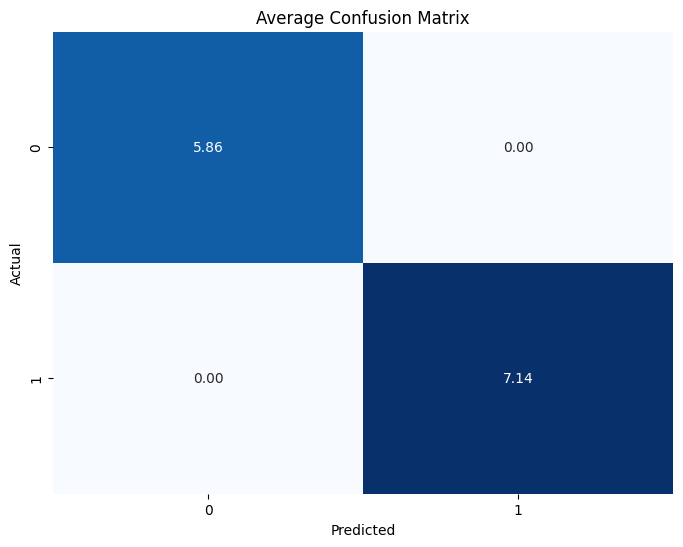

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#GradientBoostingClassifier

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score
from google.colab import files

# Set a random seed for reproducibility
random.seed(50)
np.random.seed(50)

# Combine the features into a single array
features = np.column_stack((fingerprints, homo_values, lumo_values, ff_values))

# Initialize lists to store evaluation metrics and confusion matrices
accuracies = []
f1_scores = []
recall_scores = []
cms = []
probabilities = []
feature_probabilities = []

# Run the model 200 times with different random states
for i in range(200):
    # Shuffle the data using a random number generator
    permutation = np.random.permutation(len(features))
    shuffled_features = features[permutation]
    shuffled_labels = labels[permutation]

    # Split the shuffled features and labels into training and testing datasets
    X_train, X_test, y_train, y_test = train_test_split(shuffled_features, shuffled_labels, test_size=0.20, random_state=i)

    # Train a Bagging Model
    gb_model = GradientBoostingClassifier(random_state=i)
    gb_model.fit(X_train, y_train)

    # Evaluate the model on the testing dataset
    y_pred = gb_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average=None)  # Calculate recall for each class separately
    cm = confusion_matrix(y_test, y_pred)
    proba = gb_model.predict_proba(X_test)  # Get the predicted probabilities

    # Store the evaluation metrics, confusion matrix, probabilities, and feature probabilities
    accuracies.append(accuracy)
    f1_scores.append(f1)
    recall_scores.append(recall)
    cms.append(cm)
    probabilities.append(proba)
    feature_probabilities.extend(list(zip(range(1, len(X_test) + 1), [tuple(f) for f in X_test], proba)))  # Store index, features, and their probabilities

# Calculate the average accuracy, F1 score, and recall
avg_accuracy = np.mean(accuracies)
avg_f1 = np.mean(f1_scores)
avg_recall = np.mean(recall_scores, axis=0)  # Calculate the average recall for each class separately

# Calculate the average confusion matrix
avg_cm = np.mean(cms, axis=0)

# Output feature probabilities
print('Feature Probabilities:')
feature_probabilities_avg = {}
for idx in range(63):  # Features 1-63
    feature = tuple(features[idx])
    if feature in feature_probabilities_avg:
        feature_probabilities_avg[feature].append(probabilities[idx])
    else:
        feature_probabilities_avg[feature] = [probabilities[idx]]

# Print the average accuracy, F1 score, and recall
print(f'Average Accuracy: {avg_accuracy}')
print(f'Average F1 Score: {avg_f1}')
print(f'Average Recall: {avg_recall}')


# Plot the average confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(avg_cm, annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.title("Average Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Create a dictionary to store the data
data = {'Reference': [], 'Probability_1': [], 'Probability_0': [], 'F1 Score': [], 'Accuracy': [], 'Recall_0': [], 'Recall_1': []}

# Iterate over the feature probabilities
for idx in range(63):  # Features 1-63
    feature = tuple(features[idx])
    if feature in feature_probabilities_avg:
        probabilities = feature_probabilities_avg[feature]
        avg_probabilities = np.mean(probabilities, axis=0)
        percentage_1 = avg_probabilities[:, 1].mean() * 100
        percentage_0 = avg_probabilities[:, 0].mean() * 100

        # Add data to the dictionary
        data['Reference'].append(idx + 1)
        data['Probability_1'].append(percentage_1)
        data['Probability_0'].append(percentage_0)
        data['F1 Score'].append(avg_f1)
        data['Accuracy'].append(avg_accuracy)
        data['Recall_0'].append(avg_recall[0])  # Average recall for class 0
        data['Recall_1'].append(avg_recall[1])  # Average recall for class 1

# Create a DataFrame from the data dictionary
df = pd.DataFrame(data)

# Determine the classifier and fingerprint names
classifier_name = type(gb_model).__name__
fingerprint_name = "MGN"  #MORGAN

# Create the output file name
output_file = f"{fingerprint_name}_{classifier_name}.xlsx"

# Save the DataFrame and probabilities to an Excel file
with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
    df.to_excel(writer, index=False, sheet_name='Summary')
    for idx, proba in enumerate(probabilities):
        proba_df = pd.DataFrame(proba, columns=['Probability_0', 'Probability_1'])
        proba_df.to_excel(writer, index=False, sheet_name=f'Reference_{idx + 1}_Probabilities')

# Download the Excel file
files.download(output_file)


Feature Probabilities:
Average Accuracy: 0.7811538461538461
Average F1 Score: 0.7806629767553008
Average Recall: [0.67891071 0.85328048]


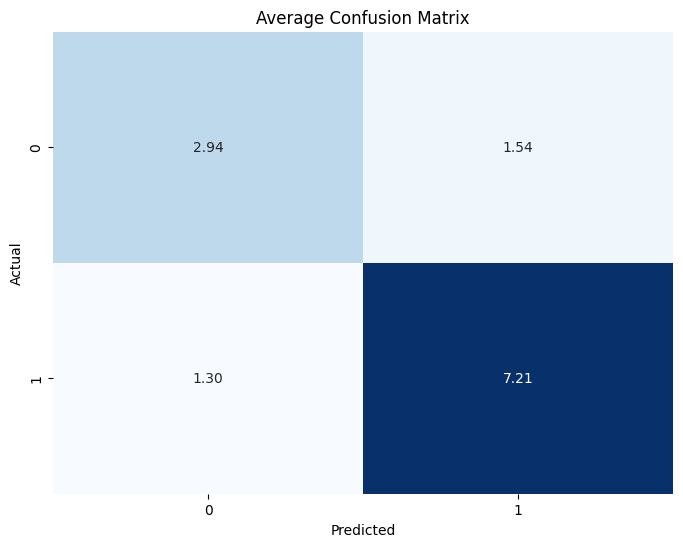

In [ ]:
#KNeighborsClassifier

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score
from google.colab import files

# Set a random seed for reproducibility
#random.seed(50)
#np.random.seed(50)

# Combine the features into a single array
features = np.column_stack((fingerprints, homo_values, lumo_values, ff_values))

# Initialize lists to store evaluation metrics and confusion matrices
accuracies = []
f1_scores = []
recall_scores = []
cms = []
probabilities = []
feature_probabilities = []

# Run the model 200 times with different random states
for i in range(200):
    # Shuffle the data using a random number generator
    permutation = np.random.permutation(len(features))
    shuffled_features = features[permutation]
    shuffled_labels = labels[permutation]

    # Split the shuffled features and labels into training and testing datasets
    X_train, X_test, y_train, y_test = train_test_split(shuffled_features, shuffled_labels, test_size=0.20, random_state=i)

    # Train a Bagging Model
    Kneighbors_model = KNeighborsClassifier(n_neighbors = 4)
    Kneighbors_model.fit(X_train, y_train)

    # Evaluate the model on the testing dataset
    y_pred = Kneighbors_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average=None)  # Calculate recall for each class separately
    cm = confusion_matrix(y_test, y_pred)
    proba = Kneighbors_model.predict_proba(X_test)  # Get the predicted probabilities

    # Store the evaluation metrics, confusion matrix, probabilities, and feature probabilities
    accuracies.append(accuracy)
    f1_scores.append(f1)
    recall_scores.append(recall)
    cms.append(cm)
    probabilities.append(proba)
    feature_probabilities.extend(list(zip(range(1, len(X_test) + 1), [tuple(f) for f in X_test], proba)))  # Store index, features, and their probabilities

# Calculate the average accuracy, F1 score, and recall
avg_accuracy = np.mean(accuracies)
avg_f1 = np.mean(f1_scores)
avg_recall = np.mean(recall_scores, axis=0)  # Calculate the average recall for each class separately

# Calculate the average confusion matrix
avg_cm = np.mean(cms, axis=0)

# Output feature probabilities
print('Feature Probabilities:')
feature_probabilities_avg = {}
for idx in range(62):  # Features 1-63
    feature = tuple(features[idx])
    if feature in feature_probabilities_avg:
        feature_probabilities_avg[feature].append(probabilities[idx])
    else:
        feature_probabilities_avg[feature] = [probabilities[idx]]

# Print the average accuracy, F1 score, and recall
print(f'Average Accuracy: {avg_accuracy}')
print(f'Average F1 Score: {avg_f1}')
print(f'Average Recall: {avg_recall}')


# Plot the average confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(avg_cm, annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.title("Average Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Create a dictionary to store the data
data = {'Reference': [], 'Probability_1': [], 'Probability_0': [], 'F1 Score': [], 'Accuracy': [], 'Recall_0': [], 'Recall_1': []}

# Iterate over the feature probabilities
for idx in range(62):  # Features 1-63
    feature = tuple(features[idx])
    if feature in feature_probabilities_avg:
        probabilities = feature_probabilities_avg[feature]
        avg_probabilities = np.mean(probabilities, axis=0)
        percentage_1 = avg_probabilities[:, 1].mean() * 100
        percentage_0 = avg_probabilities[:, 0].mean() * 100

        # Add data to the dictionary
        data['Reference'].append(idx + 1)
        data['Probability_1'].append(percentage_1)
        data['Probability_0'].append(percentage_0)
        data['F1 Score'].append(avg_f1)
        data['Accuracy'].append(avg_accuracy)
        data['Recall_0'].append(avg_recall[0])  # Average recall for class 0
        data['Recall_1'].append(avg_recall[1])  # Average recall for class 1

# Create a DataFrame from the data dictionary
df = pd.DataFrame(data)

# Determine the classifier and fingerprint names
classifier_name = type(Kneighbors_model).__name__
fingerprint_name = "MGN"  #MORGAN

# Create the output file name
output_file = f"{fingerprint_name}_{classifier_name}.xlsx"

# Save the DataFrame and probabilities to an Excel file
with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
    df.to_excel(writer, index=False, sheet_name='Summary')
    for idx, proba in enumerate(probabilities):
        proba_df = pd.DataFrame(proba, columns=['Probability_0', 'Probability_1'])
        proba_df.to_excel(writer, index=False, sheet_name=f'Reference_{idx + 1}_Probabilities')

# Download the Excel file
#files.download(output_file)


In [ ]:
#LinearSVC

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score
from google.colab import files

# Set a random seed for reproducibility
random.seed(50)
np.random.seed(50)

# Combine the features into a single array
features = np.column_stack((fingerprints, homo_values, lumo_values, ff_values))

# Initialize lists to store evaluation metrics and confusion matrices
accuracies = []
f1_scores = []
recall_scores = []
cms = []
probabilities = []
feature_probabilities = []

# Run the model 200 times with different random states
for i in range(200):
    # Shuffle the data using a random number generator
    permutation = np.random.permutation(len(features))
    shuffled_features = features[permutation]
    shuffled_labels = labels[permutation]

    # Split the shuffled features and labels into training and testing datasets
    X_train, X_test, y_train, y_test = train_test_split(shuffled_features, shuffled_labels, test_size=0.20, random_state=i)

    # Train a Bagging Model
    lsvc = LinearSVC(random_state=i)
    lsvc.fit(X_train, y_train)

    # Evaluate the model on the testing dataset
    y_pred = lsvc.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average=None)  # Calculate recall for each class separately
    cm = confusion_matrix(y_test, y_pred)
    decision_values = lsvc.decision_function(X_test)

    # Store the evaluation metrics, confusion matrix, probabilities, and feature probabilities
    accuracies.append(accuracy)
    f1_scores.append(f1)
    recall_scores.append(recall)
    cms.append(cm)
    probabilities.append(proba)
    feature_probabilities.extend(list(zip(range(1, len(X_test) + 1), [tuple(f) for f in X_test], proba)))  # Store index, features, and their probabilities

# Calculate the average accuracy, F1 score, and recall
avg_accuracy = np.mean(accuracies)
avg_f1 = np.mean(f1_scores)
avg_recall = np.mean(recall_scores, axis=0)  # Calculate the average recall for each class separately

# Calculate the average confusion matrix
avg_cm = np.mean(cms, axis=0)

# Output feature probabilities
print('Feature Probabilities:')
feature_probabilities_avg = {}
for idx in range(62):  # Features 1-62
    feature = tuple(features[idx])
    if feature in feature_probabilities_avg:
        feature_probabilities_avg[feature].append(probabilities[idx])
    else:
        feature_probabilities_avg[feature] = [probabilities[idx]]

# Print the average accuracy, F1 score, and recall
print(f'Average Accuracy: {avg_accuracy}')
print(f'Average F1 Score: {avg_f1}')
print(f'Average Recall: {avg_recall}')


# Plot the average confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(avg_cm, annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.title("Average Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Create a dictionary to store the data
data = {'Reference': [], 'Probability_1': [], 'Probability_0': [], 'F1 Score': [], 'Accuracy': [], 'Recall_0': [], 'Recall_1': []}

# Iterate over the feature probabilities
for idx in range(62):  # Features 1-62
    feature = tuple(features[idx])
    if feature in feature_probabilities_avg:
        probabilities = feature_probabilities_avg[feature]
        avg_probabilities = np.mean(probabilities, axis=0)
        percentage_1 = avg_probabilities[:, 1].mean() * 100
        percentage_0 = avg_probabilities[:, 0].mean() * 100

        # Add data to the dictionary
        data['Reference'].append(idx + 1)
        data['Probability_1'].append(percentage_1)
        data['Probability_0'].append(percentage_0)
        data['F1 Score'].append(avg_f1)
        data['Accuracy'].append(avg_accuracy)
        data['Recall_0'].append(avg_recall[0])  # Average recall for class 0
        data['Recall_1'].append(avg_recall[1])  # Average recall for class 1

# Create a DataFrame from the data dictionary
df = pd.DataFrame(data)

# Determine the classifier and fingerprint names
classifier_name = type(lsvc).__name__
fingerprint_name = "MGN"  #MORGAN

# Create the output file name
output_file = f"{fingerprint_name}_{classifier_name}.xlsx"

# Save the DataFrame and probabilities to an Excel file
with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
    df.to_excel(writer, index=False, sheet_name='Summary')
    for idx, proba in enumerate(probabilities):
        proba_df = pd.DataFrame(proba, columns=['Probability_0', 'Probability_1'])
        proba_df.to_excel(writer, index=False, sheet_name=f'Reference_{idx + 1}_Probabilities')

# Download the Excel file
files.download(output_file)


Feature Probabilities:
Average Accuracy: 0.8938461538461538
Average F1 Score: 0.8939223915489396
Average Recall: [0.91222222 0.88640025]


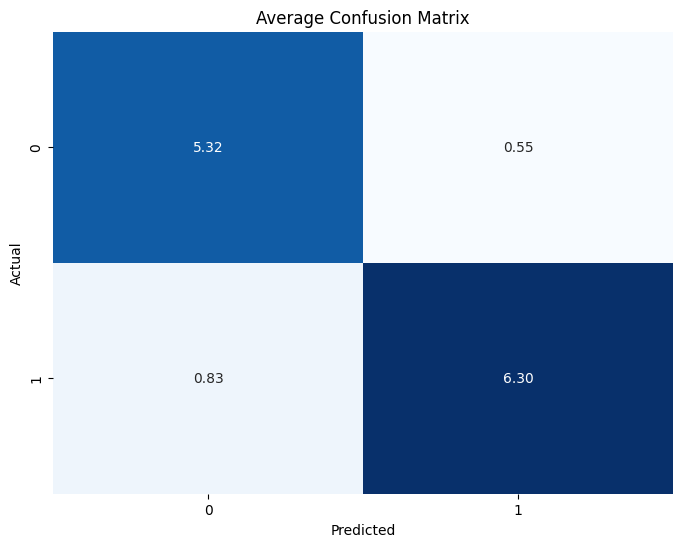

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#LogisticRegression

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score
from google.colab import files

# Set a random seed for reproducibility
random.seed(50)
np.random.seed(50)

# Combine the features into a single array
features = np.column_stack((fingerprints, homo_values, lumo_values, ff_values))

# Initialize lists to store evaluation metrics and confusion matrices
accuracies = []
f1_scores = []
recall_scores = []
cms = []
probabilities = []
feature_probabilities = []

# Run the model 200 times with different random states
for i in range(200):
    # Shuffle the data using a random number generator
    permutation = np.random.permutation(len(features))
    shuffled_features = features[permutation]
    shuffled_labels = labels[permutation]

    # Split the shuffled features and labels into training and testing datasets
    X_train, X_test, y_train, y_test = train_test_split(shuffled_features, shuffled_labels, test_size=0.20, random_state=i)

    # Train a Bagging Model
    lr = LogisticRegression(random_state=i)
    lr.fit(X_train, y_train)

    # Evaluate the model on the testing dataset
    y_pred = lr.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average=None)  # Calculate recall for each class separately
    cm = confusion_matrix(y_test, y_pred)
    proba = lr.predict_proba(X_test)  # Get the predicted probabilities

    # Store the evaluation metrics, confusion matrix, probabilities, and feature probabilities
    accuracies.append(accuracy)
    f1_scores.append(f1)
    recall_scores.append(recall)
    cms.append(cm)
    probabilities.append(proba)
    feature_probabilities.extend(list(zip(range(1, len(X_test) + 1), [tuple(f) for f in X_test], proba)))  # Store index, features, and their probabilities

# Calculate the average accuracy, F1 score, and recall
avg_accuracy = np.mean(accuracies)
avg_f1 = np.mean(f1_scores)
avg_recall = np.mean(recall_scores, axis=0)  # Calculate the average recall for each class separately

# Calculate the average confusion matrix
avg_cm = np.mean(cms, axis=0)

# Output feature probabilities
print('Feature Probabilities:')
feature_probabilities_avg = {}
for idx in range(63):  # Features 1-63
    feature = tuple(features[idx])
    if feature in feature_probabilities_avg:
        feature_probabilities_avg[feature].append(probabilities[idx])
    else:
        feature_probabilities_avg[feature] = [probabilities[idx]]

# Print the average accuracy, F1 score, and recall
print(f'Average Accuracy: {avg_accuracy}')
print(f'Average F1 Score: {avg_f1}')
print(f'Average Recall: {avg_recall}')


# Plot the average confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(avg_cm, annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.title("Average Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Create a dictionary to store the data
data = {'Reference': [], 'Probability_1': [], 'Probability_0': [], 'F1 Score': [], 'Accuracy': [], 'Recall_0': [], 'Recall_1': []}

# Iterate over the feature probabilities
for idx in range(63):  # Features 1-63
    feature = tuple(features[idx])
    if feature in feature_probabilities_avg:
        probabilities = feature_probabilities_avg[feature]
        avg_probabilities = np.mean(probabilities, axis=0)
        percentage_1 = avg_probabilities[:, 1].mean() * 100
        percentage_0 = avg_probabilities[:, 0].mean() * 100

        # Add data to the dictionary
        data['Reference'].append(idx + 1)
        data['Probability_1'].append(percentage_1)
        data['Probability_0'].append(percentage_0)
        data['F1 Score'].append(avg_f1)
        data['Accuracy'].append(avg_accuracy)
        data['Recall_0'].append(avg_recall[0])  # Average recall for class 0
        data['Recall_1'].append(avg_recall[1])  # Average recall for class 1

# Create a DataFrame from the data dictionary
df = pd.DataFrame(data)

# Determine the classifier and fingerprint names
classifier_name = type(lr).__name__
fingerprint_name = "MGN"  #MORGAN

# Create the output file name
output_file = f"{fingerprint_name}_{classifier_name}.xlsx"

# Save the DataFrame and probabilities to an Excel file
with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
    df.to_excel(writer, index=False, sheet_name='Summary')
    for idx, proba in enumerate(probabilities):
        proba_df = pd.DataFrame(proba, columns=['Probability_0', 'Probability_1'])
        proba_df.to_excel(writer, index=False, sheet_name=f'Reference_{idx + 1}_Probabilities')

# Download the Excel file
files.download(output_file)

Feature Probabilities:
Average Accuracy: 0.8257692307692309
Average F1 Score: 0.8234489955778657
Average Recall: [0.75782738 0.89239863]


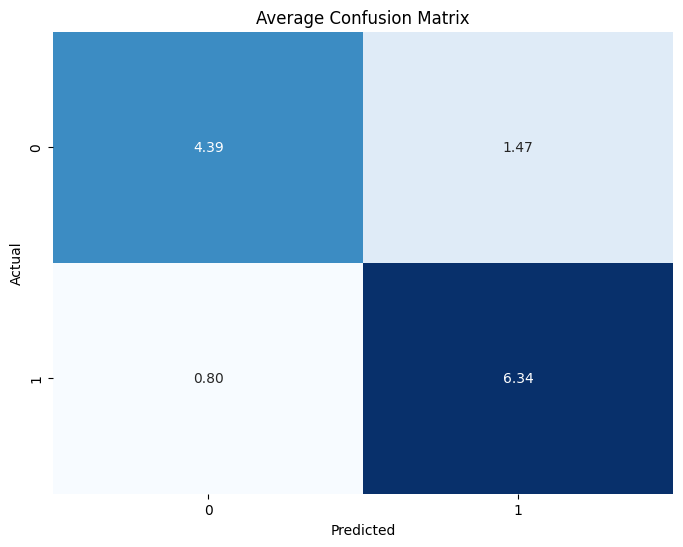

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score
from google.colab import files

# Set a random seed for reproducibility
random.seed(50)
np.random.seed(50)

# Combine the features into a single array
features = np.column_stack((fingerprints, homo_values, lumo_values, ff_values))

# Initialize lists to store evaluation metrics and confusion matrices
accuracies = []
f1_scores = []
recall_scores = []
cms = []
probabilities = []
feature_probabilities = []

# Run the model 200 times with different random states
for i in range(200):
    # Shuffle the data using a random number generator
    permutation = np.random.permutation(len(features))
    shuffled_features = features[permutation]
    shuffled_labels = labels[permutation]

    # Split the shuffled features and labels into training and testing datasets
    X_train, X_test, y_train, y_test = train_test_split(shuffled_features, shuffled_labels, test_size=0.20, random_state=i)

    # Train a Bagging Model
    mlp = MLPClassifier(random_state=i)
    mlp.fit(X_train, y_train)

    # Evaluate the model on the testing dataset
    y_pred = mlp.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average=None)  # Calculate recall for each class separately
    cm = confusion_matrix(y_test, y_pred)
    proba = mlp.predict_proba(X_test)  # Get the predicted probabilities

    # Store the evaluation metrics, confusion matrix, probabilities, and feature probabilities
    accuracies.append(accuracy)
    f1_scores.append(f1)
    recall_scores.append(recall)
    cms.append(cm)
    probabilities.append(proba)
    feature_probabilities.extend(list(zip(range(1, len(X_test) + 1), [tuple(f) for f in X_test], proba)))  # Store index, features, and their probabilities

# Calculate the average accuracy, F1 score, and recall
avg_accuracy = np.mean(accuracies)
avg_f1 = np.mean(f1_scores)
avg_recall = np.mean(recall_scores, axis=0)  # Calculate the average recall for each class separately

# Calculate the average confusion matrix
avg_cm = np.mean(cms, axis=0)

# Output feature probabilities
print('Feature Probabilities:')
feature_probabilities_avg = {}
for idx in range(63):  # Features 1-63
    feature = tuple(features[idx])
    if feature in feature_probabilities_avg:
        feature_probabilities_avg[feature].append(probabilities[idx])
    else:
        feature_probabilities_avg[feature] = [probabilities[idx]]

# Print the average accuracy, F1 score, and recall
print(f'Average Accuracy: {avg_accuracy}')
print(f'Average F1 Score: {avg_f1}')
print(f'Average Recall: {avg_recall}')


# Plot the average confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(avg_cm, annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.title("Average Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Create a dictionary to store the data
data = {'Reference': [], 'Probability_1': [], 'Probability_0': [], 'F1 Score': [], 'Accuracy': [], 'Recall_0': [], 'Recall_1': []}

# Iterate over the feature probabilities
for idx in range(63):  # Features 1-63
    feature = tuple(features[idx])
    if feature in feature_probabilities_avg:
        probabilities = feature_probabilities_avg[feature]
        avg_probabilities = np.mean(probabilities, axis=0)
        percentage_1 = avg_probabilities[:, 1].mean() * 100
        percentage_0 = avg_probabilities[:, 0].mean() * 100

        # Add data to the dictionary
        data['Reference'].append(idx + 1)
        data['Probability_1'].append(percentage_1)
        data['Probability_0'].append(percentage_0)
        data['F1 Score'].append(avg_f1)
        data['Accuracy'].append(avg_accuracy)
        data['Recall_0'].append(avg_recall[0])  # Average recall for class 0
        data['Recall_1'].append(avg_recall[1])  # Average recall for class 1

# Create a DataFrame from the data dictionary
df = pd.DataFrame(data)

# Determine the classifier and fingerprint names
classifier_name = type(mlp).__name__
fingerprint_name = "MGN"  #MORGAN

# Create the output file name
output_file = f"{fingerprint_name}_{classifier_name}.xlsx"

# Save the DataFrame and probabilities to an Excel file
with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
    df.to_excel(writer, index=False, sheet_name='Summary')
    for idx, proba in enumerate(probabilities):
        proba_df = pd.DataFrame(proba, columns=['Probability_0', 'Probability_1'])
        proba_df.to_excel(writer, index=False, sheet_name=f'Reference_{idx + 1}_Probabilities')

# Download the Excel file
files.download(output_file)

Feature Probabilities:
Average Accuracy: 0.7769230769230768
Average F1 Score: 0.7663064772344959
Average Recall: [0.62066071 0.92737428]


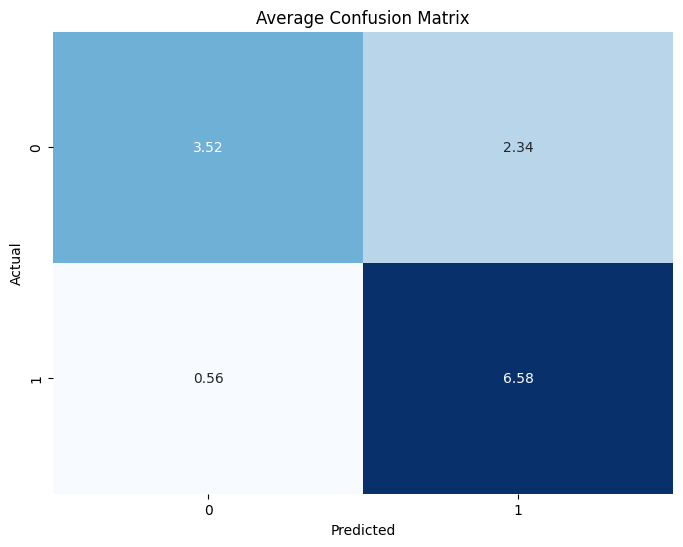

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#MultinomalNB

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score
from google.colab import files

# Set a random seed for reproducibility
random.seed(50)
np.random.seed(50)

# Combine the features into a single array
features = np.column_stack((fingerprints, homo_values, lumo_values, ff_values))

# Apply data scaling to ensure non-negative values
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

# Initialize lists to store evaluation metrics and confusion matrices
accuracies = []
f1_scores = []
recall_scores = []
cms = []
probabilities = []
feature_probabilities = []

# Run the model 200 times with different random states
for i in range(200):
    # Shuffle the data using a random number generator
    permutation = np.random.permutation(len(features))
    shuffled_features = features[permutation]
    shuffled_labels = labels[permutation]

    # Split the shuffled features and labels into training and testing datasets
    X_train, X_test, y_train, y_test = train_test_split(shuffled_features, shuffled_labels, test_size=0.20, random_state=i)

    # Train a Bagging Model
    mnnb = MultinomialNB()
    mnnb.fit(X_train, y_train)

    # Evaluate the model on the testing dataset
    y_pred = mnnb.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average=None)  # Calculate recall for each class separately
    cm = confusion_matrix(y_test, y_pred)
    proba = mnnb.predict_proba(X_test)  # Get the predicted probabilities

    # Store the evaluation metrics, confusion matrix, probabilities, and feature probabilities
    accuracies.append(accuracy)
    f1_scores.append(f1)
    recall_scores.append(recall)
    cms.append(cm)
    probabilities.append(proba)
    feature_probabilities.extend(list(zip(range(1, len(X_test) + 1), [tuple(f) for f in X_test], proba)))  # Store index, features, and their probabilities

# Calculate the average accuracy, F1 score, and recall
avg_accuracy = np.mean(accuracies)
avg_f1 = np.mean(f1_scores)
avg_recall = np.mean(recall_scores, axis=0)  # Calculate the average recall for each class separately

# Calculate the average confusion matrix
avg_cm = np.mean(cms, axis=0)

# Output feature probabilities
print('Feature Probabilities:')
feature_probabilities_avg = {}
for idx in range(63):  # Features 1-63
    feature = tuple(features[idx])
    if feature in feature_probabilities_avg:
        feature_probabilities_avg[feature].append(probabilities[idx])
    else:
        feature_probabilities_avg[feature] = [probabilities[idx]]

# Print the average accuracy, F1 score, and recall
print(f'Average Accuracy: {avg_accuracy}')
print(f'Average F1 Score: {avg_f1}')
print(f'Average Recall: {avg_recall}')


# Plot the average confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(avg_cm, annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.title("Average Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Create a dictionary to store the data
data = {'Reference': [], 'Probability_1': [], 'Probability_0': [], 'F1 Score': [], 'Accuracy': [], 'Recall_0': [], 'Recall_1': []}

# Iterate over the feature probabilities
for idx in range(63):  # Features 1-63
    feature = tuple(features[idx])
    if feature in feature_probabilities_avg:
        probabilities = feature_probabilities_avg[feature]
        avg_probabilities = np.mean(probabilities, axis=0)
        percentage_1 = avg_probabilities[:, 1].mean() * 100
        percentage_0 = avg_probabilities[:, 0].mean() * 100

        # Add data to the dictionary
        data['Reference'].append(idx + 1)
        data['Probability_1'].append(percentage_1)
        data['Probability_0'].append(percentage_0)
        data['F1 Score'].append(avg_f1)
        data['Accuracy'].append(avg_accuracy)
        data['Recall_0'].append(avg_recall[0])  # Average recall for class 0
        data['Recall_1'].append(avg_recall[1])  # Average recall for class 1

# Create a DataFrame from the data dictionary
df = pd.DataFrame(data)

# Determine the classifier and fingerprint names
classifier_name = type(mnnb).__name__
fingerprint_name = "MGN"  #MORGAN

# Create the output file name
output_file = f"{fingerprint_name}_{classifier_name}.xlsx"

# Save the DataFrame and probabilities to an Excel file
with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
    df.to_excel(writer, index=False, sheet_name='Summary')
    for idx, proba in enumerate(probabilities):
        proba_df = pd.DataFrame(proba, columns=['Probability_0', 'Probability_1'])
        proba_df.to_excel(writer, index=False, sheet_name=f'Reference_{idx + 1}_Probabilities')

# Download the Excel file
files.download(output_file)


In [ ]:

#NearestCentroid
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score
from google.colab import files

# Set a random seed for reproducibility
random.seed(50)
np.random.seed(50)

# Combine the features into a single array
features = np.column_stack((fingerprints, homo_values, lumo_values, ff_values))

# Initialize lists to store evaluation metrics and confusion matrices
accuracies = []
f1_scores = []
recall_scores = []
cms = []
probabilities = []
feature_probabilities = []

# Run the model 200 times with different random states
for i in range(200):
    # Shuffle the data using a random number generator
    permutation = np.random.permutation(len(features))
    shuffled_features = features[permutation]
    shuffled_labels = labels[permutation]

    # Split the shuffled features and labels into training and testing datasets
    X_train, X_test, y_train, y_test = train_test_split(shuffled_features, shuffled_labels, test_size=0.20, random_state=i)

    # Train a NearestCentroid Model
    nc = NearestCentroid()
    nc.fit(X_train, y_train)

    # Evaluate the model on the testing dataset
    y_pred = nc.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average=None)  # Calculate recall for each class separately
    cm = confusion_matrix(y_test, y_pred)

    # Store the evaluation metrics, confusion matrix, and feature probabilities
    accuracies.append(accuracy)
    f1_scores.append(f1)
    recall_scores.append(recall)
    cms.append(cm)
    probabilities.append(None)  # No predicted probabilities available
    feature_probabilities.extend(list(zip(range(1, len(X_test) + 1), [tuple(f) for f in X_test], [None]*len(X_test))))

# Calculate the average accuracy, F1 score, and recall
avg_accuracy = np.mean(accuracies)
avg_f1 = np.mean(f1_scores)
avg_recall = np.mean(recall_scores, axis=0)  # Calculate the average recall for each class separately

# Calculate the average confusion matrix
avg_cm = np.mean(cms, axis=0)

# Output feature probabilities
print('Feature Probabilities:')
feature_probabilities_avg = {}
for idx in range(63):  # Features 1-63
    feature = tuple(features[idx])
    if feature in feature_probabilities_avg:
        feature_probabilities_avg[feature].append(None)  # No probabilities available
    else:
        feature_probabilities_avg[feature] = [None]  # No probabilities available

# Print the average accuracy, F1 score, and recall
print(f'Average Accuracy: {avg_accuracy}')
print(f'Average F1 Score: {avg_f1}')
print(f'Average Recall: {avg_recall}')

# Plot the average confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(avg_cm, annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.title("Average Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Create a dictionary to store the data
data = {'Reference': [], 'Probability_1': [], 'Probability_0': [], 'F1 Score': [], 'Accuracy': [], 'Recall_0': [], 'Recall_1': []}

# Iterate over the feature probabilities
for idx in range(63):  # Features 1-63
    feature = tuple(features[idx])
    if feature in feature_probabilities_avg:
        probabilities = feature_probabilities_avg[feature]
        avg_probabilities = np.mean(probabilities, axis=0)
        percentage_1 = 0  # No probabilities available
        percentage_0 = 0  # No probabilities available

        # Add data to the dictionary
        data['Reference'].append(idx + 1)
        data['Probability_1'].append(percentage_1)
        data['Probability_0'].append(percentage_0)
        data['F1 Score'].append(avg_f1)
        data['Accuracy'].append(avg_accuracy)
        data['Recall_0'].append(avg_recall[0])  # Average recall for class 0
        data['Recall_1'].append(avg_recall[1])  # Average recall for class 1

# Create a DataFrame from the data dictionary
df = pd.DataFrame(data)

# Determine the classifier and fingerprint names
classifier_name = type(nc).__name__
fingerprint_name = "MGN"  #MORGAN

# Create the output file name
output_file = f"{fingerprint_name}_{classifier_name}.xlsx"

# Save the DataFrame and probabilities to an Excel file
with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
    df.to_excel(writer, index=False, sheet_name='Summary')
    for idx, proba in enumerate(probabilities):
        proba_df = pd.DataFrame(proba, columns=['Probability_0', 'Probability_1'])
        proba_df.to_excel(writer, index=False, sheet_name=f'Reference_{idx + 1}_Probabilities')

# Download the Excel file
files.download(output_file)


In [ ]:
#NearestCentroid

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsOneClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score
from google.colab import files

# Set a random seed for reproducibility
random.seed(50)
np.random.seed(50)

# Combine the features into a single array
features = np.column_stack((fingerprints, homo_values, lumo_values, ff_values))

# Initialize lists to store evaluation metrics and confusion matrices
accuracies = []
f1_scores = []
recall_scores = []
cms = []
probabilities = []
feature_probabilities = []

# Run the model 200 times with different random states
for i in range(200):
    # Shuffle the data using a random number generator
    permutation = np.random.permutation(len(features))
    shuffled_features = features[permutation]
    shuffled_labels = labels[permutation]

    # Split the shuffled features and labels into training and testing datasets
    X_train, X_test, y_train, y_test = train_test_split(shuffled_features, shuffled_labels, test_size=0.20, random_state=i)

    # Train a Bagging Model
    ovo = OneVsOneClassifier( estimator = NearestCentroid())
    ovo.fit(X_train, y_train)

    # Evaluate the model on the testing dataset
    y_pred = ovo.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average=None)  # Calculate recall for each class separately
    cm = confusion_matrix(y_test, y_pred)
    proba = ovo.predict_proba(X_test)  # Get the predicted probabilities

    # Store the evaluation metrics, confusion matrix, probabilities, and feature probabilities
    accuracies.append(accuracy)
    f1_scores.append(f1)
    recall_scores.append(recall)
    cms.append(cm)
    probabilities.append(proba)
    feature_probabilities.extend(list(zip(range(1, len(X_test) + 1), [tuple(f) for f in X_test], proba)))  # Store index, features, and their probabilities

# Calculate the average accuracy, F1 score, and recall
avg_accuracy = np.mean(accuracies)
avg_f1 = np.mean(f1_scores)
avg_recall = np.mean(recall_scores, axis=0)  # Calculate the average recall for each class separately

# Calculate the average confusion matrix
avg_cm = np.mean(cms, axis=0)

# Output feature probabilities
print('Feature Probabilities:')
feature_probabilities_avg = {}
for idx in range(63):  # Features 1-63
    feature = tuple(features[idx])
    if feature in feature_probabilities_avg:
        feature_probabilities_avg[feature].append(probabilities[idx])
    else:
        feature_probabilities_avg[feature] = [probabilities[idx]]

# Print the average accuracy, F1 score, and recall
print(f'Average Accuracy: {avg_accuracy}')
print(f'Average F1 Score: {avg_f1}')
print(f'Average Recall: {avg_recall}')


# Plot the average confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(avg_cm, annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.title("Average Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Create a dictionary to store the data
data = {'Reference': [], 'Probability_1': [], 'Probability_0': [], 'F1 Score': [], 'Accuracy': [], 'Recall_0': [], 'Recall_1': []}

# Iterate over the feature probabilities
for idx in range(63):  # Features 1-63
    feature = tuple(features[idx])
    if feature in feature_probabilities_avg:
        probabilities = feature_probabilities_avg[feature]
        avg_probabilities = np.mean(probabilities, axis=0)
        percentage_1 = avg_probabilities[:, 1].mean() * 100
        percentage_0 = avg_probabilities[:, 0].mean() * 100

        # Add data to the dictionary
        data['Reference'].append(idx + 1)
        data['Probability_1'].append(percentage_1)
        data['Probability_0'].append(percentage_0)
        data['F1 Score'].append(avg_f1)
        data['Accuracy'].append(avg_accuracy)
        data['Recall_0'].append(avg_recall[0])  # Average recall for class 0
        data['Recall_1'].append(avg_recall[1])  # Average recall for class 1

# Create a DataFrame from the data dictionary
df = pd.DataFrame(data)

# Determine the classifier and fingerprint names
classifier_name = type(ovo).__name__
fingerprint_name = "MGN"  #MORGAN

# Create the output file name
output_file = f"{fingerprint_name}_{classifier_name}.xlsx"

# Save the DataFrame and probabilities to an Excel file
with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
    df.to_excel(writer, index=False, sheet_name='Summary')
    for idx, proba in enumerate(probabilities):
        proba_df = pd.DataFrame(proba, columns=['Probability_0', 'Probability_1'])
        proba_df.to_excel(writer, index=False, sheet_name=f'Reference_{idx + 1}_Probabilities')

# Download the Excel file
files.download(output_file)


In [ ]:
Daylight, Torsion, Avalon,